# Análisis exploratorio de datos

## Trabajo de Fin de Grado

### Convocatoria especial de finalización de estudios 2024-2025

### Alumno: Javier Domingo Collado

### Tutores: Pablo Bermejo López y José Antonio Gámez Martín

Para comenzar cargaremos la base de datos para examinarla, ver que variables contiene y dar una breve descripción de ellas

In [1]:
import pandas as pd

# Cargar la base de datos
data = pd.read_csv('dataframe.csv')

# Mostrar las primeras filas y la información de las columnas, como pueden ser los valores nulos
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 56 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CASOS           336 non-null    int64  
 1   NIV_EST         336 non-null    int64  
 2   EST_CIV         336 non-null    int64  
 3   SEXO            336 non-null    float64
 4   EDAD            327 non-null    float64
 5   ALB             223 non-null    float64
 6   AU              283 non-null    float64
 7   BAS             332 non-null    float64
 8   BAS_PERCENT     332 non-null    float64
 9   BT.717          244 non-null    float64
 10  CA              234 non-null    float64
 11  CHCM            332 non-null    float64
 12  CL              287 non-null    float64
 13  COL             279 non-null    float64
 14  CREA            328 non-null    float64
 15  EOS             332 non-null    float64
 16  EOS_PERCENT     332 non-null    float64
 17  ERITRO          332 non-null    flo

(   CASOS  NIV_EST  EST_CIV  SEXO       EDAD  ALB    AU   BAS  BAS_PERCENT  \
 0      1        0        2   1.0  45.579740  4.7   4.5  0.04          0.5   
 1      1        0        3   2.0  54.417522  NaN   5.4  0.04          0.5   
 2      1        0        1   1.0  56.495551  4.6   6.5  0.05          0.5   
 3      1        0        3   1.0  40.829569  4.9   5.4  0.06          0.6   
 4      1        0        2   1.0  43.770021  4.4  10.6  0.04          0.7   
 
    BT.717  ...   PLAQ   PT      TG  TRANS   URE    VCM   VPM  Sodio  \
 0     0.3  ...  210.0  7.1   121.0  276.0  35.0   89.5   9.2  141.0   
 1     NaN  ...  315.0  6.6   181.0    NaN  32.0   98.9   8.3    NaN   
 2     0.1  ...  258.0  6.5   156.0    NaN  37.0   94.9   9.3  143.0   
 3     0.6  ...  238.0  7.7    45.0  251.0  23.0  102.9  10.1  142.0   
 4     0.7  ...  141.0  7.5  1107.0  227.0  30.0   94.0  10.5  141.0   
 
    UBES_TOTAL  Bebedor_Riesgo  
 0        36.0               1  
 1        28.0               1

La base de datos contiene 56 variables relacionados con datos clínicos y biométircos de pacientes. Se pueden diferenciar entre númericas que son Casos, Niv_Est, Est_Civ, Sexo y Bebedor Riesgo. El resto de variables son categóricas

En el siguiente bloque de código, se crea un mapa de calor para visualizar los valores faltantes en el conjunto de datos. Para poder sacarlo se utiliza la biblioteca Seaborn para generarlo, que nos permite identificar las columnas y filas con valores faltantes. Con este mapa se puede observar con rapidez la distribución de los valores faltantes para proceder a una limpieza de los datos ahora a continuación.

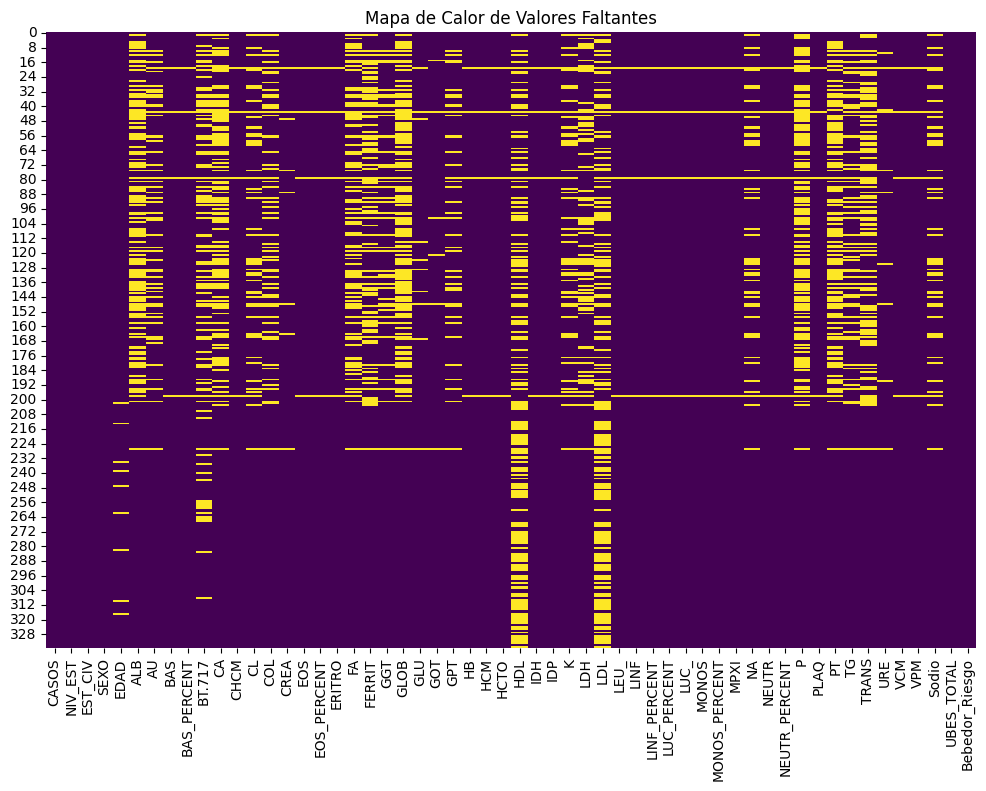

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapa de calor de valores faltantes
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Faltantes')
plt.show()

Ahora vamos a calcular los valores faltantes por columnas y también su porcentaje de pérdida, como refuerzo de información al mapa de calor

In [3]:
# Calcular los valores faltantes por columna
valoresfaltantes = data.isnull().sum()

# Porcentaje de valores faltantes
porcentajededatosfaltantes= (data.isnull().sum() / len(data)) * 100

# Crear un DataFrame para visualizar ambos, conteo y porcentaje de valores faltantes
valoresfaltantes = pd.DataFrame({
    'Valoresfaltantes': valoresfaltantes,
    'Porcentaje': porcentajededatosfaltantes
})

print(valoresfaltantes)

                Valoresfaltantes  Porcentaje
CASOS                          0    0.000000
NIV_EST                        0    0.000000
EST_CIV                        0    0.000000
SEXO                           0    0.000000
EDAD                           9    2.678571
ALB                          113   33.630952
AU                            53   15.773810
BAS                            4    1.190476
BAS_PERCENT                    4    1.190476
BT.717                        92   27.380952
CA                           102   30.357143
CHCM                           4    1.190476
CL                            49   14.583333
COL                           57   16.964286
CREA                           8    2.380952
EOS                            4    1.190476
EOS_PERCENT                    4    1.190476
ERITRO                         4    1.190476
FA                            85   25.297619
FERRIT                        87   25.892857
GGT                           43   12.797619
GLOB      

Eliminamos las columnas con más de un 10 por ciento de valores faltantes para hacer el mejor filtrado posible. Además de esto los valores restantes del resto de variables se imputarán por la media.

In [4]:
# Filtrar las columnas que tienen más de un 5% de valores faltantes
eliminarcolumnas = porcentajededatosfaltantes[porcentajededatosfaltantes > 10].index

# Eliminar estas columnas del DataFrame
data_cleaned = data.drop(columns=eliminarcolumnas)



# Imputar los valores faltantes del DataFrame limpio con la media de cada columna
for column in data_cleaned.columns:
    if data_cleaned[column].isnull().any():  # Solo imputar si hay valores faltantes
        data_cleaned[column].fillna(data_cleaned[column].mean(), inplace=True)
        
# Guardar el nuevo DataFrame sin las columnas con más de un 10% de valores faltantes
data_cleaned.to_csv('Basededatoslimpia.csv', index=False)
print(f"Se han eliminado las siguientes columnas con más del 10% de valores faltantes: {list(eliminarcolumnas)}")

Se han eliminado las siguientes columnas con más del 10% de valores faltantes: ['ALB', 'AU', 'BT.717', 'CA', 'CL', 'COL', 'FA', 'FERRIT', 'GGT', 'GLOB', 'GPT', 'HDL', 'K', 'LDH', 'LDL', 'NA', 'P', 'PT', 'TG', 'TRANS', 'Sodio']


C:\Users\javid\AppData\Local\Temp\ipykernel_30004\596372178.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned[column].fillna(data_cleaned[column].mean(), inplace=True)


Ahora creamos la base de datos con Ferritina incluida

In [5]:
eliminarcolumnas = eliminarcolumnas.drop('FERRIT')

# Eliminar estas columnas del DataFrame
data_cleanedferritina = data.drop(columns=eliminarcolumnas)



# Imputar los valores faltantes del DataFrame limpio con la media de cada columna
for column in data_cleanedferritina.columns:
    if data_cleanedferritina[column].isnull().any():  # Solo imputar si hay valores faltantes
        data_cleanedferritina[column].fillna(data_cleanedferritina[column].mean(), inplace=True)
        
# Guardar el nuevo DataFrame sin las columnas con más de un 10% de valores faltantes
data_cleanedferritina.to_csv('BasededatoslimpiaconFerrit.csv', index=False)
print(f"Se han eliminado las siguientes columnas con más del 10% de valores faltantes manteniendo la columna de Ferritina: {list(eliminarcolumnas)}")

Se han eliminado las siguientes columnas con más del 10% de valores faltantes manteniendo la columna de Ferritina: ['ALB', 'AU', 'BT.717', 'CA', 'CL', 'COL', 'FA', 'GGT', 'GLOB', 'GPT', 'HDL', 'K', 'LDH', 'LDL', 'NA', 'P', 'PT', 'TG', 'TRANS', 'Sodio']


C:\Users\javid\AppData\Local\Temp\ipykernel_30004\1525239747.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleanedferritina[column].fillna(data_cleanedferritina[column].mean(), inplace=True)


Además se ha estudiado la posibilidad previa de solo eliminar las columnas con más de 5%, pero tienen el mismo resultado, en cambio si lo cambiamos a 15%, coge otras 5 variables más

In [6]:
data_cleaned.head(), data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CASOS           336 non-null    int64  
 1   NIV_EST         336 non-null    int64  
 2   EST_CIV         336 non-null    int64  
 3   SEXO            336 non-null    float64
 4   EDAD            336 non-null    float64
 5   BAS             336 non-null    float64
 6   BAS_PERCENT     336 non-null    float64
 7   CHCM            336 non-null    float64
 8   CREA            336 non-null    float64
 9   EOS             336 non-null    float64
 10  EOS_PERCENT     336 non-null    float64
 11  ERITRO          336 non-null    float64
 12  GLU             336 non-null    float64
 13  GOT             336 non-null    float64
 14  HB              336 non-null    float64
 15  HCM             336 non-null    float64
 16  HCTO            336 non-null    float64
 17  IDH             336 non-null    flo

(   CASOS  NIV_EST  EST_CIV  SEXO       EDAD   BAS  BAS_PERCENT  CHCM  CREA  \
 0      1        0        2   1.0  45.579740  0.04          0.5  34.8  0.97   
 1      1        0        3   2.0  54.417522  0.04          0.5  33.8  0.65   
 2      1        0        1   1.0  56.495551  0.05          0.5  33.1  1.02   
 3      1        0        3   1.0  40.829569  0.06          0.6  31.3  0.71   
 4      1        0        2   1.0  43.770021  0.04          0.7  34.4  0.88   
 
     EOS  ...  MONOS_PERCENT  MPXI  NEUTR  NEUTR_PERCENT   PLAQ   URE    VCM  \
 0  0.16  ...            7.0  -8.7   3.82           48.2  210.0  35.0   89.5   
 1  0.76  ...            0.2  -2.8   0.09            1.0  315.0  32.0   98.9   
 2  0.46  ...            5.0   1.7   5.63           59.0  258.0  37.0   94.9   
 3  0.14  ...            6.5  -3.5   5.28           58.2  238.0  23.0  102.9   
 4  0.10  ...            4.9  -0.2   2.96           49.8  141.0  30.0   94.0   
 
     VPM  UBES_TOTAL  Bebedor_Riesgo  
 0 

En el siguiente bloque de código, vamos a calcular y visualizar las correlaciones de Pearson entre 'UBES_TOTAL' y otras variables numéricas del conjunto de datos. Este análisis nos permitirá identificar qué variables están fuertemente correlacionadas con 'UBES_TOTAL', lo que puede proporcionar información valiosa sobre las relaciones entre las variables.

Al final mostraremos un gráfico resultante que nos permitirá entender mejor cómo 'UBES_TOTAL' se relaciona con otras variables en el conjunto de datos.


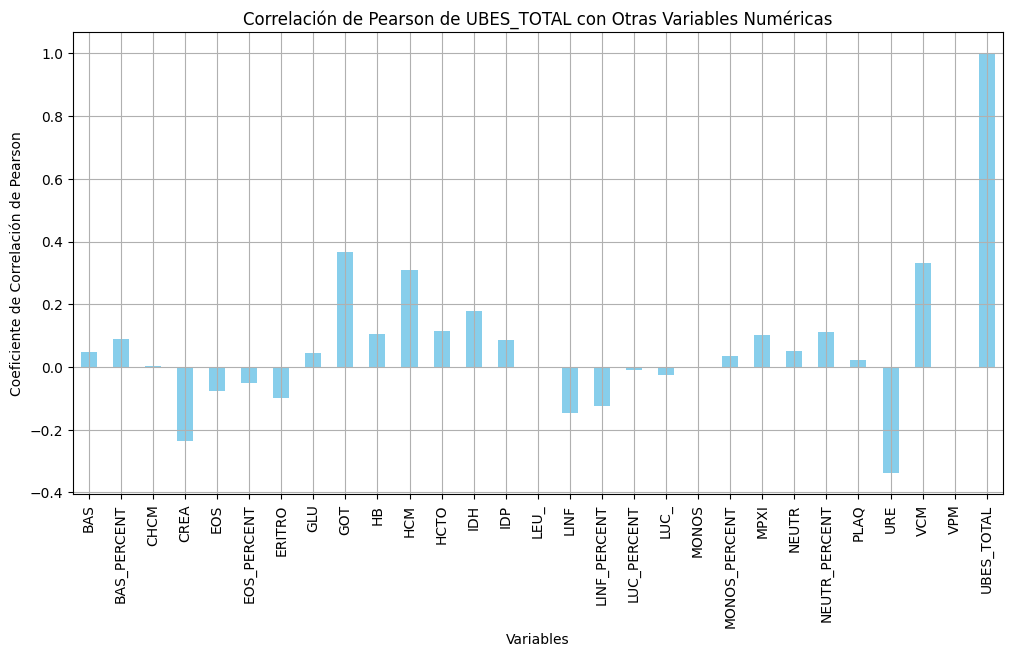

In [7]:
import matplotlib.pyplot as plt

# Asegurarse de que el DataFrame solo contiene columnas numéricas, excluyendo 'CASOS', 'Bebedor_Riesgo' y 'UBES_TOTAL'
numeric_df = data_cleaned.select_dtypes(include=['int64', 'float64']).drop(columns=['CASOS', 'NIV_EST','EST_CIV','EDAD','SEXO','Bebedor_Riesgo'])

# Calcular la matriz de correlación de Pearson
pearson_corr = numeric_df.corr()

# Extraer la fila de correlaciones para 'UBES_TOTAL'
if 'UBES_TOTAL' in pearson_corr.index:
    ubes_total_corr = pearson_corr.loc['UBES_TOTAL']

    # Visualizar las correlaciones como un gráfico de barras
    ubes_total_corr.plot(kind='bar', figsize=(12, 6), color='skyblue')
    plt.title('Correlación de Pearson de UBES_TOTAL con Otras Variables Numéricas')
    plt.xlabel('Variables')
    plt.ylabel('Coeficiente de Correlación de Pearson')
    plt.grid(True)
    plt.show()
else:
    print("La columna 'UBES_TOTAL' no está presente en las columnas numéricas.")


Ahora vamos a calcular y visualizar las correlaciones de Pearson entre 'UBES_TOTAL' y otras variables numéricas específicamente para el grupo de hombres (SEXO) = 1). Este análisis nos permitirá identificar qué variables están fuertemente correlacionadas con 'UBES_TOTAL' dentro del subgrupo de hombres.

Mostramos un gráfico que nos permite entender mejor cómo 'UBES_TOTAL' se relaciona con otras variables en el subgrupo de hombres.

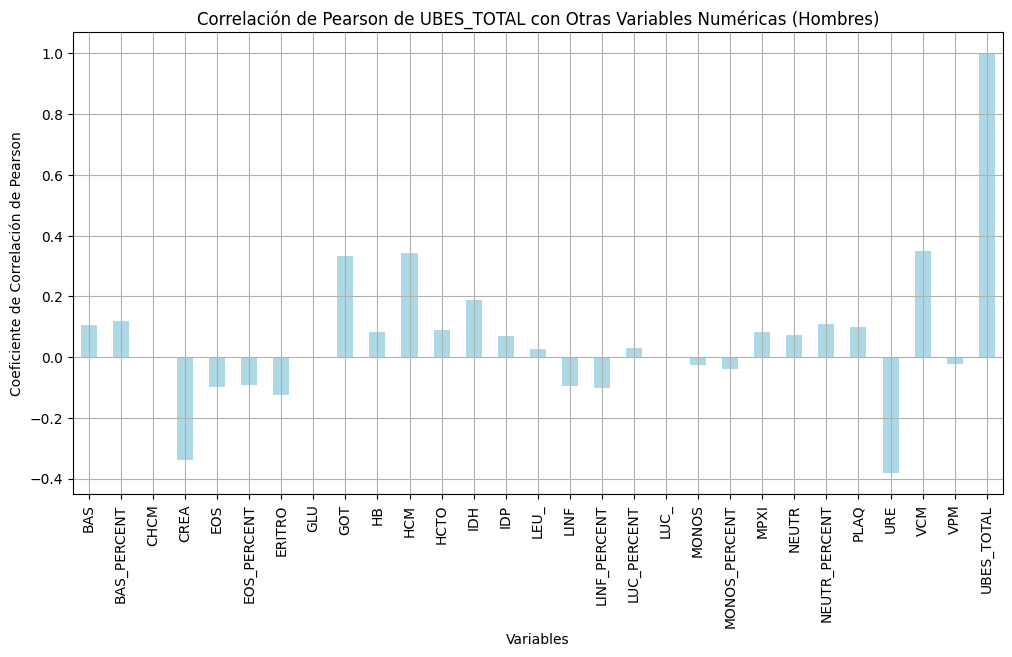

In [8]:
# Calcular la matriz de correlación de Pearson para hombres (sexo = 1)
numeric_df_men = numeric_df[data_cleaned['SEXO'] == 1]
pearson_corr_men = numeric_df_men.corr()

# Extraer la fila de correlaciones para 'UBES_TOTAL' en hombres
if 'UBES_TOTAL' in pearson_corr_men.index:
    ubes_total_corr_men = pearson_corr_men.loc['UBES_TOTAL']

    # Visualizar las correlaciones como un gráfico de barras para hombres
    ubes_total_corr_men.plot(kind='bar', figsize=(12, 6), color='lightblue')
    plt.title('Correlación de Pearson de UBES_TOTAL con Otras Variables Numéricas (Hombres)')
    plt.xlabel('Variables')
    plt.ylabel('Coeficiente de Correlación de Pearson')
    plt.grid(True)
    plt.show()
else:
    print("La columna 'UBES_TOTAL' no está presente en las columnas numéricas para hombres.")


Ahora vamos a calcular y visualizar las correlaciones de Pearson entre 'UBES_TOTAL' y otras variables numéricas específicamente para el grupo de mujeres (SEXO) = 2). Este análisis nos permitirá identificar qué variables están fuertemente correlacionadas con 'UBES_TOTAL' dentro del subgrupo de mujeres.

Mostramos un gráfico que nos permite entender mejor cómo 'UBES_TOTAL' se relaciona con otras variables en el subgrupo de mujeres.

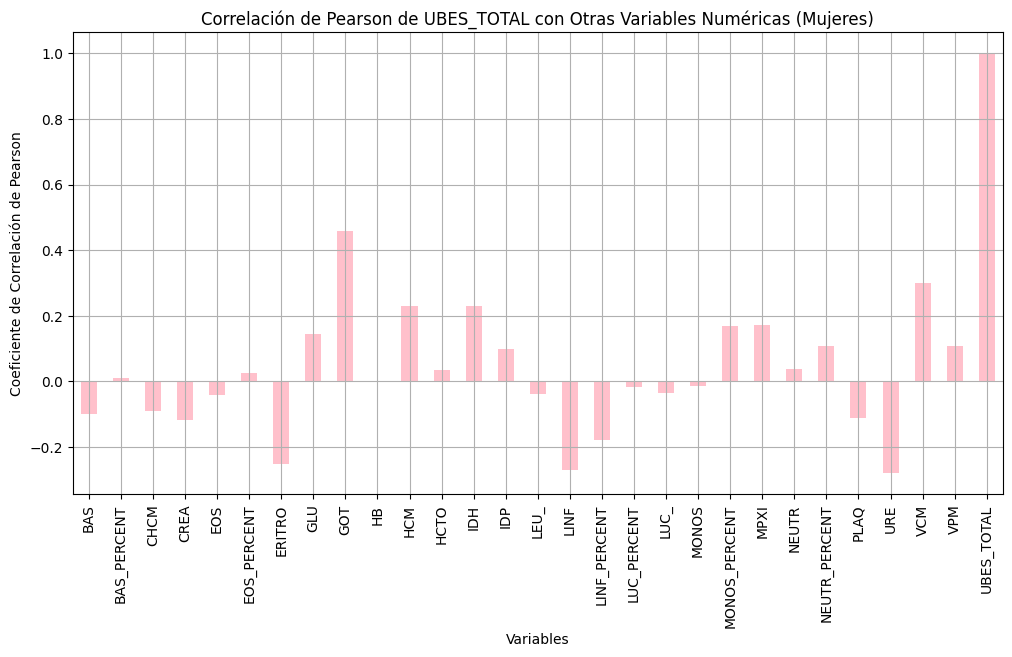

In [9]:
# Calcular la matriz de correlación de Pearson para mujeres (sexo = 2)
numeric_df_women = numeric_df[data_cleaned['SEXO'] == 2]
pearson_corr_women = numeric_df_women.corr()

# Extraer la fila de correlaciones para 'UBES_TOTAL' en mujeres
if 'UBES_TOTAL' in pearson_corr_women.index:
    ubes_total_corr_women = pearson_corr_women.loc['UBES_TOTAL']

    # Visualizar las correlaciones como un gráfico de barras para mujeres
    ubes_total_corr_women.plot(kind='bar', figsize=(12, 6), color='pink')
    plt.title('Correlación de Pearson de UBES_TOTAL con Otras Variables Numéricas (Mujeres)')
    plt.xlabel('Variables')
    plt.ylabel('Coeficiente de Correlación de Pearson')
    plt.grid(True)
    plt.show()
else:
    print("La columna 'UBES_TOTAL' no está presente en las columnas numéricas para mujeres.")

In [10]:
from scipy.stats import mannwhitneyu

# Prueba de Mann-Whitney U para comparar medias entre bebedores de riesgo y no bebedores de riesgo
variables = numeric_df.columns
grupo_hombres = data_cleaned[data_cleaned['SEXO'] == 1]
grupo_mujeres = data_cleaned[data_cleaned['SEXO'] == 2]

resultados_hombres = {}
resultados_mujeres = {}

for variable in variables:
    if variable != 'UBES_TOTAL' and variable != 'SEXO':
        # Mann-Whitney U para hombres
        bebedores_hombres = grupo_hombres[grupo_hombres['Bebedor_Riesgo'] == 1][variable].dropna()
        no_bebedores_hombres = grupo_hombres[grupo_hombres['Bebedor_Riesgo'] == 0][variable].dropna()
        
        if len(bebedores_hombres) > 0 and len(no_bebedores_hombres) > 0:
            _, p_value_hombres = mannwhitneyu(bebedores_hombres, no_bebedores_hombres)
            resultados_hombres[variable] = p_value_hombres
        
        # Mann-Whitney U para mujeres
        bebedores_mujeres = grupo_mujeres[grupo_mujeres['Bebedor_Riesgo'] == 1][variable].dropna()
        no_bebedores_mujeres = grupo_mujeres[grupo_mujeres['Bebedor_Riesgo'] == 0][variable].dropna()
        
        if len(bebedores_mujeres) > 0 and len(no_bebedores_mujeres) > 0:
            _, p_value_mujeres = mannwhitneyu(bebedores_mujeres, no_bebedores_mujeres)
            resultados_mujeres[variable] = p_value_mujeres

# Crear DataFrames para visualizar los resultados
resultados_hombres_df = pd.DataFrame.from_dict(resultados_hombres, orient='index', columns=['p_value']).sort_values(by='p_value')
resultados_mujeres_df = pd.DataFrame.from_dict(resultados_mujeres, orient='index', columns=['p_value']).sort_values(by='p_value')

print("Resultados de la prueba de Mann-Whitney U para hombres:")
print(resultados_hombres_df)

print("Resultados de la prueba de Mann-Whitney U para mujeres:")
print(resultados_mujeres_df)

Resultados de la prueba de Mann-Whitney U para hombres:
                    p_value
HCM            8.584752e-16
VCM            2.589574e-15
URE            6.002945e-15
CREA           2.211433e-12
IDH            2.865633e-09
BAS            7.437134e-06
GOT            8.050224e-06
GLU            1.047175e-03
HCTO           1.404848e-03
HB             2.770725e-03
ERITRO         2.911927e-03
LINF_PERCENT   7.576873e-03
NEUTR_PERCENT  1.084136e-02
EOS_PERCENT    2.531773e-02
PLAQ           3.096149e-02
BAS_PERCENT    4.612866e-02
NEUTR          6.416656e-02
LINF           8.116257e-02
MPXI           8.390244e-02
EOS            8.955411e-02
LEU_           2.071818e-01
MONOS_PERCENT  4.908121e-01
LUC_PERCENT    8.296502e-01
MONOS          8.405515e-01
CHCM           8.853336e-01
IDP            8.928617e-01
LUC_           9.201825e-01
VPM            9.414867e-01
Resultados de la prueba de Mann-Whitney U para mujeres:
                    p_value
GOT            1.200107e-07
HCM            1.088